In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Text(0.5, 1.0, 'Scatter Plot of original dataset')

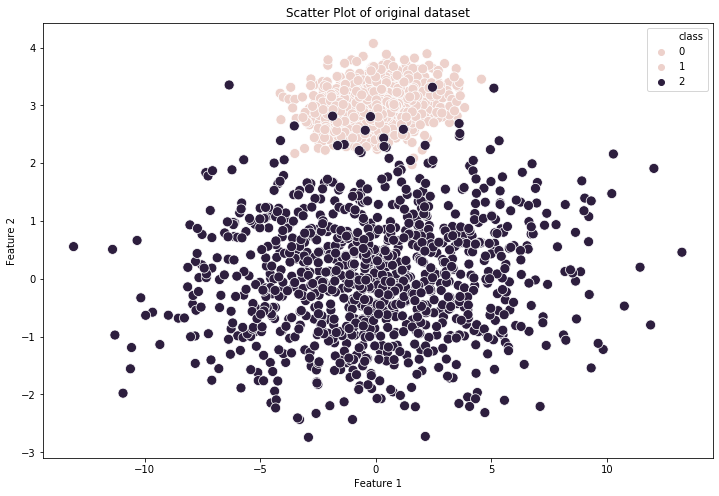

In [2]:
df = pd.read_excel('lda_data.xlsx')
X = df.iloc[:, :2]  # Extracting Feature
y = df.iloc[:, 2] #class

fig = plt.figure(figsize=(12,8))
sns.scatterplot(X['feature 1'], X['feature 2'], hue= y, s=100)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of original dataset")

In [3]:
#Standardizing feature
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [4]:
# using sklear to perform pca
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

#Reconstructing Dataframe
principalDf = pd.DataFrame(data = X_pca, columns = ['PC1'])
principalDf['class'] = y
print(principalDf)

           PC1  class
0    -0.653974      1
1    -0.557413      1
2    -0.199133      1
3    -0.433971      1
4    -0.721537      1
...        ...    ...
1995 -2.703542      2
1996  1.031262      2
1997 -0.064526      2
1998 -1.413530      2
1999  1.264081      2

[2000 rows x 2 columns]


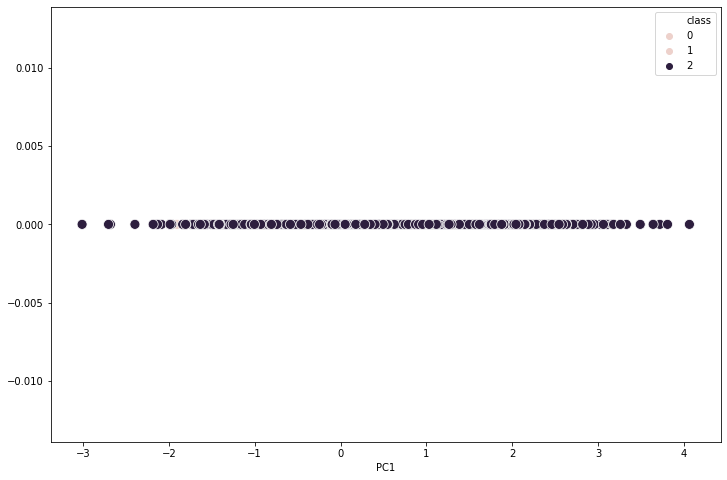

In [5]:
# plotting Reduced dataset
plt.figure(figsize=(12, 8))
sns.scatterplot(principalDf['PC1'], [0] * len(principalDf), hue = principalDf['class'], s=100)

In [6]:
df = pd.read_excel('lda_data.xlsx')
X = df.iloc[:, :2]  # Extracting Feature
y = df.iloc[:, 2] #class

In [7]:
#Standardizing feature
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [8]:
#pca from scratch
cov_matrix = np.cov(X.T)  #Covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_matrix)

eig_vec = eig_vec.T
idxs = np.argsort(eig_val)[::-1]    #sort the eigenvector
eig_val = eig_val[idxs]
eig_vec = eig_vec[idxs]


projected = np.dot(X,eig_vec[0])

principaldf = pd.DataFrame(projected, columns=['PC1'])
principaldf['class'] = y
print(principaldf)

           PC1  class
0     0.653974      1
1     0.557413      1
2     0.199133      1
3     0.433971      1
4     0.721537      1
...        ...    ...
1995  2.703542      2
1996 -1.031262      2
1997  0.064526      2
1998  1.413530      2
1999 -1.264081      2

[2000 rows x 2 columns]


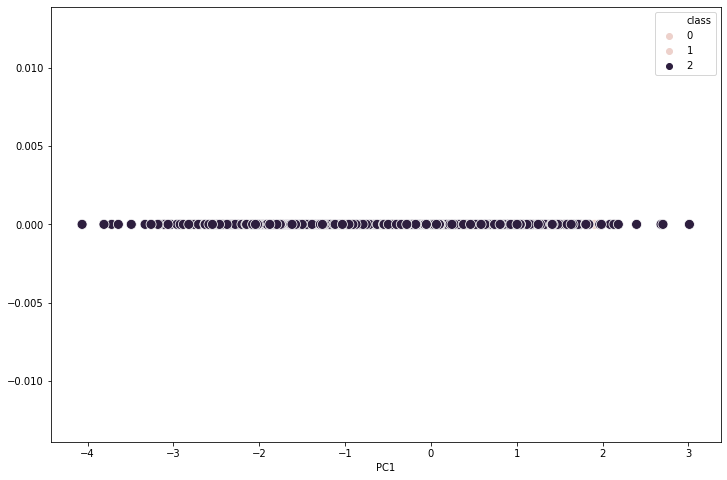

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(principaldf['PC1'], [0] * len(principaldf),hue = y, s=100)

In [10]:
explained_variances = []
for i in range(len(eig_val)):
    explained_variances.append(eig_val[i] / np.sum(eig_val))
 
print(explained_variances)

[0.5244439983567165, 0.4755560016432835]
